In [2]:
#!pip install contextualized-topic-models==2.5.0
#!pip install pyldavis

Defaulting to user installation because normal site-packages is not writeable
  Using cached contextualized_topic_models-2.5.0-py2.py3-none-any.whl (36 kB)
  Using cached torchvision-0.15.1-cp310-cp310-manylinux1_x86_64.whl (6.0 MB)
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached gensim-4.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.0 MB)
  Using cached ipython-8.10.0-py3-none-any.whl (784 kB)
  Using cached wordcloud-1.9.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (455 kB)
  Using cached torch-2.0.0-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Using cached ipywidgets-7.5.1-py2.py3-none-any.whl (121 kB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached widgetsnbextension-3.5.2-py2.py3-none-any.whl (1.6 MB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached transformers-4.28.1-py3-none-any.whl (7.0 MB)
  Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
  Using cached 

  Using cached lit-16.0.2-py3-none-any.whl
  Using cached cmake-3.26.3-py2.py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (24.0 MB)
  Using cached regex-2023.5.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (769 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)


  Using cached webcolors-1.13-py3-none-any.whl (14 kB)
  Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
  Using cached jsonpointer-2.3-py2.py3-none-any.whl (7.8 kB)
  Using cached uri_template-1.2.0-py3-none-any.whl (10 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
open3d 0.17.0 requires ipywidgets>=8.0.4, but you have ipywidgets 7.5.1 which is incompatible.
ipyspin 1.0.1 requires ipywidgets<9,>=7.6.0, but you have ipywidgets 7.5.1 which is incompatible.
ipyleaflet 0.17.2 requires ipywidgets<9,>=7.6.0, but you have ipywidgets 7.5.1 which is incompatible.
ipyevents 2.0.1 requires ipywidgets>=7.6.0, but you have ipywidgets 7.5.1 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Using cached pandas-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached numexpr-2.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (381 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wrf-python 1.3.4.1 requires basemap, which is not installed.
open3d 0.17.0 requires ipywidgets>=8.0.4, but you have ipywidgets 7.5.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
lidar 0.7.1 requires PySimpleGUI==2.30.0,

In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [2]:
import matplotlib.pyplot as plt
import csv
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk
from nltk.corpus import stopwords as stop_words
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import sys
import os
import requests
sys.path.append("../")
from src import puhti_files
from src.common_basis import *

ModuleNotFoundError: No module named 'hereutil'

In [4]:
SEED = 42
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = puhti_files.genre_data_to_pandas(data="dev", add_labels=True, merge_ecco=True)
df = df[~df['publication_year'].isna()]
df['decade'] = df['publication_year'].apply(lambda x: int(str(int(x))[:-1]+'0'))

Read in dataset dev.csv. Set param 'data' to 'dev', 'test' or 'train' if you want another dataset.


In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/fengbo11/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df['work_id'].unique().tolist()

['X-biographical sketches of some of the leading men at present at the head of affairs in france',
 '19754-rudiments and practical exercises for learning french language',
 '1-liturgies',
 '1519-new history of holy bible',
 '1653-thesaurus linguae latinae compendiarius',
 '479-man of feeling',
 '5631-britains commercial interest explained and improved',
 '35-meditations and contemplations in two volumes',
 '45-colloquia',
 '28-seasons',
 '240-quinti horatii flacci venusini poetae lyrici poemata omnia doctissimis scholijs and nouis aliquot annotatiunculis illustrata',
 '172-tom jones',
 '56488-excursion in two volumes',
 '4725-a new abridgment of law',
 '317-sir charles grandison',
 '199-royal dictionary',
 '21200-characteristics of present political state of great britain',
 '13-aesops fables',
 '885-letters',
 '282-epigrammata',
 'X-the adventurer',
 '277-practical treatise upon christian perfection',
 '2203-chronology or historians vade mecum',
 '20990-law of devises revocations and 

In [39]:
df[df['document_id']=='1783800119']

,document_id,work_id,main_category,sub_category,main_category_label,sub_category_label,publication_year,gatherings,total_price,publication_place,author_id,other_actors,decade


In [8]:
#Topic classifications, combining both sebastian and Eli analisis.
# NA - > The topic only contains weird tokens, doesn't represent anything
topics_names = {1720: {1: 'Kings',
  2: 'Verbs?/War?',
  3: 'Goverment/Royal',
  4: 'Romance',
  5: 'Law',
  6: 'Prayer/Bible',
  7: 'Social',
  8: 'War?',
  9: 'Religion',
  10: 'Science'},
 1730: {1: 'Locations/People',
  2: 'Social Concepts',
  3: 'State',
  4: 'Religion',
  5: 'Bigger Concepts',
  6: 'Kings',
  7: 'Religion',
  8: 'Nature',
  9: 'Goverment/Kingdom',
  10: 'Romance'},
 1740: {1: 'War/Kingdom',
  2: 'Religion',
  3: 'NA?',
  4: 'Law',
  5: 'Religion',
  6: 'Nature',
  7: 'Romance',
  8: 'Romance',
  9: 'Royalty',
  10: 'Philosophy'},
 1750: {1: 'Kingdom',
  2: 'NA',
  3: 'Romance/Religion',
  4: 'Religion',
  5: 'NA',
  6: 'Country/Issues',
  7: 'Kingdom',
  8: 'Mankind',
  9: 'Bible/Religion',
  10: 'Nature'},
 1760: {1: 'Love/Family',
  2: 'Nature',
  3: 'Love/Religious Concepts',
  4: 'Kingdom',
  5: 'Bible/Religion',
  6: 'Religion',
  7: 'Government affairs',
  8: 'NA',
  9: 'State Affairs',
  10: 'Philosophy'},
 1770: {1: 'NA',
  2: 'Law/Court',
  3: 'Love/Religion',
  4: 'Kingdom',
  5: 'Mankind',
  6: 'Love',
  7: 'Higher Power',
  8: 'Kingdom/War',
  9: 'Nature',
  10: 'Church/Religion'},
 1780: {1: 'NA',
  2: 'War',
  3: 'Law',
  4: 'Mandkind',
  5: 'Romance',
  6: 'Medicine',
  7: 'Religion',
  8: 'Prayer/Bible',
  9: 'Trade/Economy',
  10: 'Court/Kingdom'},
 1790: {1: 'NA',
  2: 'Love',
  3: 'Law',
  4: 'Parliament',
  5: 'Literature?',
  6: 'Romance',
  7: 'Religion',
  8: 'Countries/Land/Economy',
  9: 'Ingredients?',
  10: 'Mankind'}}

In [9]:
topics_df = pd.DataFrame.from_dict(topics_names)
topics_df

,1720,1730,1740,1750,1760,1770,1780,1790
1,Kings,Locations/People,War/Kingdom,Kingdom,Love/Family,NA,NA,NA
2,Verbs?/War?,Social Concepts,Religion,NA,Nature,Law/Court,War,Love
3,Goverment/Royal,State,NA?,Romance/Religion,Love/Religious Concepts,Love/Religion,Law,Law
4,Romance,Religion,Law,Religion,Kingdom,Kingdom,Mandkind,Parliament
5,Law,Bigger Concepts,Religion,NA,Bible/Religion,Mankind,Romance,Literature?
6,Prayer/Bible,Kings,Nature,Country/Issues,Religion,Love,Medicine,Romance
7,Social,Religion,Romance,Kingdom,Government affairs,Higher Power,Religion,Religion
8,War?,Nature,Romance,Mankind,NA,Kingdom/War,Prayer/Bible,Countries/Land/Economy
9,Religion,Goverment/Kingdom,Royalty,Bible/Religion,State Affairs,Nature,Trade/Economy,Ingredients?
10,Science,Romance,Philosophy,Nature,Philosophy,Church/Religion,Court/Kingdom,Mankind


In [13]:
#df = pd.read_table('/scratch/project_2007227/genre_data/ecco_metadata.tsv')
#df = df[~df['publication_year'].isna()]
#df['decade'] = df['publication_year'].apply(lambda x: int(str(int(x))[:-1]+'0'))

In [14]:
#Original visualization, just for one book. It must receive an ID that is a str
def book_pattern_vis(id, chunksize=512, ybottom=0):
    #We need to identify the age of the book to use the correct model. Extract year from metadata
    id= str(id)
    year = 1720
    try:
        year = df[df['document_id'] ==id]['publication_year'].values[0]
    except:
        print('Doc id not found')
    year = int(year)
    work_id = df[df['document_id'] ==id]['work_id'].values[0]
    #if the book is from earlier era than 1720, gives erros since we don't have model from that era.
    if year < 1720:
        print('Publication year of the document is not included in the models, please try another document.')
        return True
    
    #if the book is ok, we need to first preprocess the document for the model
    #First divide the text into chunks
    with open('/scratch/project_2007227/genre_data/ecco_source/'+str(id)+'.txt', 'r') as f:
        lines = f.readlines()
    
    text = " ".join(lines)
    new_text = '\n'.join([text[i:i+chunksize] for i in range(0, len(text), chunksize)])
    
    with open('/scratch/project_2007227/genre_data/chunk'+str(chunksize)+'/'+str(id)+str(chunksize)+'.txt', 'w') as f:
        f.write(new_text)
              
    text_file = '/scratch/project_2007227/genre_data/chunk'+str(chunksize)+'/'+str(id)+str(chunksize)+'.txt'
    
    with open(text_file, 'r') as f:
        lines = f.readlines()
    
    num_chunks = len(lines)
    
    # Fetch the correct model
    modelnumber = ((year // 10) % 10)-2
    decade = int(str(int(year))[:-1]+'0')
    with open('/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/tp_models/tp_model'+str(modelnumber)+'.pickle', 'rb') as tpmodel:
        tpmodeli = pickle.load(tpmodel)

    ctm = ZeroShotTM(bow_size=len(tpmodeli.vocab), contextual_size=768, n_components=10, num_epochs=20)
    ctm.load("/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/ctm_models"+str(modelnumber)+"/contextualized_topic_model_nc_10_tpm_0.0_tpv_0.9_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99",
                                                                                                          epoch=19)

        
    documents = [line.strip() for line in open(text_file, encoding="utf-8").readlines()[0: num_chunks]]

    stopwords = list(stop_words.words("english"))

    sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)
    preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()
    
    processed_data = tpmodeli.transform(unpreprocessed_corpus)#this was preprocessed_documents before
    pred_model = ctm.get_thetas(processed_data, n_samples=20) 
    #
    maxs = np.argmax(np.sum(pred_model, axis=0))
    #print(topics_names[decade][maxs+1])
    pred_model2 = pred_model.copy()
    pred_model2[:,maxs] = 0
    #
    rectangles = []
    for i in range(0, len(pred_model), 20):
        start = i
        end = i+20
        #std = np.std(pred_model2[start:end])
        average = np.mean(pred_model2[start:end], axis = 0) #the condition
        #a = np.argwhere(std < .5)
        b = np.argwhere(average > .2)
        #outcome_idx = np.array(np.squeeze(b))
        if (len(b) != 0):
            rectangles.append(plt.Rectangle((i, 0.3), 20, 0.7, alpha=0.3, facecolor='C'+str(int(b[0]))))
    #
    plt.figure(figsize=(20,2))
    plt.plot(pred_model, '.', alpha = .5)
    if len(rectangles) != 0:
        for rectangle in rectangles:
            plt.gca().add_patch(rectangle)
    
    
    plt.ylim((.3,1))
    plt.title('Sequential genre prediction for document '+str(id)+' in with '+str(chunksize)+' token chunks. The document is from the decade '+str(decade) + ', with work id ' + str(work_id))
    plt.legend(topics_names[decade].values(),loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    #
    return pred_model

/users/fengbo11/.local/lib/python3.10/site-packages/contextualized_topic_models/models/ctm.py:669: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  warnings.warn(
/run/nvme/job_16521888/tmp/ipykernel_3188578/4147182965.py:46: ResourceWarning: unclosed file <_io.TextIOWrapper name='/scratch/project_2007227/genre_data/chunk512/0283800402512.txt' mode='r' encoding='utf-8'>
  documents = [line.strip() for line in open(text_file, encoding="utf-8").readlines()[0: num_chunks]]
/users/fengbo11/.local/lib/python3.10/site-packages/contextualized_topic_models/utils/data_preparation.py:192: UserWarning: The method did not have in input the text_for_bow parameter. This IS EXPECTED if you are using ZeroShotTM in a cross-lingual setting
  warnings.warn(


Batches:   0%|          | 0/107 [00:00<?, ?it/s]

/users/fengbo11/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/334 [00:00<?, ?it/s]/users/fengbo11/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_creat

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f3202845840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f29745ab880>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f3202845840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f29745ab880>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f3202845840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWar

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f3202845840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f29745ab880>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f3202845840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f29745ab880>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f3202845840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWar

NA


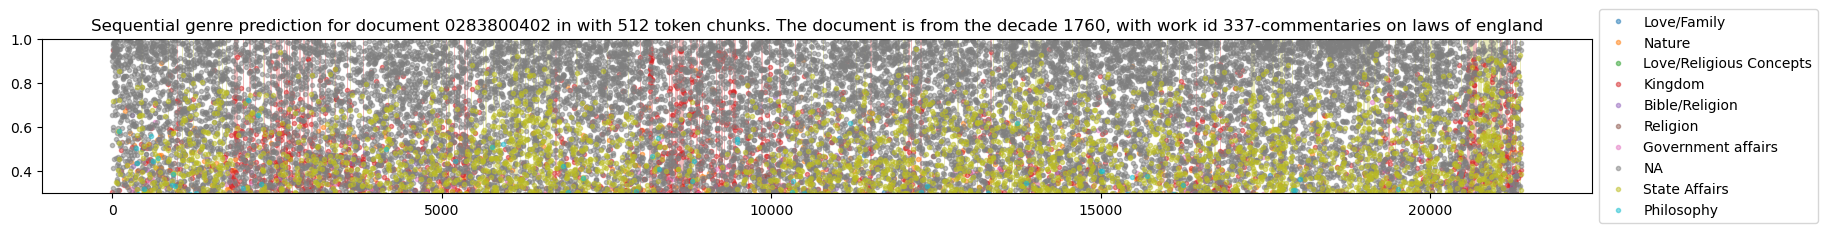

In [20]:
pred_model = book_pattern_vis('0283800402', chunksize=512, ybottom = 0.3)

In [ ]:
#Method that given a decade, will visualize 6 samples of it.
#If random_state is True, it will always use the same random state seed, which means that it will always return the same samples
#To see different documents, use random_state=False, so it shows a completly random sample of 6 documents
def book_pattern_vis_sample(decade, chunksize=512, ybottom=0,num_samples=6,random_state=True):
    #We need to identify the age of the book to use the correct model. Extract year from metadata
    if random_state:
        samples = df[df['decade']==decade].sample(n = num_samples,random_state=423)
    else:
        samples = df[df['decade']==decade].sample(n = num_samples)

    ids = samples['document_id'].tolist()
    works_ids = samples['work_id'].tolist()
    stopwords = list(stop_words.words("english"))
    
    modelnumber = ((decade // 10) % 10)-2
    #decade = int(str(int(year))[:-1]+'0')
    with open('/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/tp_models/tp_model'+str(modelnumber)+'.pickle', 'rb') as tpmodel:
        tpmodeli = pickle.load(tpmodel)

    ctm = ZeroShotTM(bow_size=len(tpmodeli.vocab), contextual_size=768, n_components=10, num_epochs=20)
    ctm.load("/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/ctm_models"+str(modelnumber)+"/contextualized_topic_model_nc_10_tpm_0.0_tpv_0.9_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99",
                                                                                                          epoch=19)
    
    #First divide the text into chunks
    documents = []
    for i in ids:
        len_id = len(str(i))
        if len_id<10:
            i = '0'*(10 - len_id) + str(i)
        else:
            i = str(i)
        with open('/scratch/project_2007227/genre_data/ecco_source/'+str(i)+'.txt', 'r') as f:
            lines = f.readlines()
            num_lines = len(lines)
            text = " ".join(lines)
            new_text = '\n'.join([text[i:i+chunksize] for i in range(0, len(text), chunksize)])
        with open('/scratch/project_2007227/genre_data/chunk512/'+str(i)+'512.txt', 'w') as f:
            f.write(new_text)
        text_file = '/scratch/project_2007227/genre_data/chunk512/'+str(i)+'512.txt'
        documents.append([line.strip() for line in open(text_file, encoding="utf-8").readlines()[0:num_lines]])
    thetas = []
    for i in range(len(documents)):
        sp = WhiteSpacePreprocessingStopwords(documents[i], stopwords_list=stopwords)
        preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()
        processed_data = tpmodeli.transform(preprocessed_documents)
        pred_model = ctm.get_thetas(processed_data, n_samples=20) 
        thetas.append(pred_model)
    
    #tp = TopicModelDataPreparation("paraphrase-multilingual-mpnet-base-v2")
    #processed_data= tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)
    
    #Nextly we fetch the model that corresponds to the publication year

    figure, axis = plt.subplots(2, 3, figsize=(16,12),squeeze=False)
    for i in range(len(thetas)):
        axis[i%2, i%3].plot(thetas[i], '.')
        axis[i%2, i%3].axis(ymin=ybottom,ymax=1)
        axis[i%2, i%3].set_title(f"D {ids[i]} - work id {str(works_ids[i])}")
        
    figure.legend(topics_names[decade].values(),loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
book_pattern_vis_sample(1720,random_state=True)

In [ ]:
#Method that uses pre_loaded test datasets to visualize. The problem is that it can only use the chunks, 
#but it doesn't have the original document
def test_loaded_sets(decade):
    modelnumber = ((decade // 10) % 10)-2
    test_sets = []
    with open('/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/tp_models/tp_model'+str(modelnumber)+'.pickle', 'rb') as tpmodel:
        tpmodeli = pickle.load(tpmodel)

    ctm = ZeroShotTM(bow_size=len(tpmodeli.vocab), contextual_size=768, n_components=10, num_epochs=20)
    ctm.load("/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/ctm_models"+str(modelnumber)+"/contextualized_topic_model_nc_10_tpm_0.0_tpv_0.9_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99",
                                                                                                          epoch=19)

    with open('/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/Test_sets/test_set'+str(modelnumber)+'.pickle', 'rb') as dataset:
        dataseti = pickle.load(dataset)
        test_sets.append(dataseti)

    thetas = []
    for i in test_sets:
        pred_model = ctm.get_thetas(i, n_samples=20)
        thetas.append(pred_model)

    thetas = np.array(thetas)
    thetas_ov = np.mean(thetas,axis=1)
    thetas_ov = np.squeeze(thetas)
    plt.figure(figsize=(10,8))
    plt.plot(thetas_ov, '.')
    plt.ylim((0,1))
    plt.title('Topic prediction for test set with  '+str(thetas_ov.shape[0])+' chunks. The documents are from the decade '+str(decade))
    plt.legend(topics_names[decade].values(),loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
test_loaded_sets(1760)

In [ ]:
test_loaded_sets(1780)

In [ ]:
test_loaded_sets(1720)

In [ ]:
#Method that will sample 6 documents from the given decade and genre.
#The decade must be between 1720 and 1790, and the genre must be the name of the genre, not the number.
#If random_state is True, it will always use the same random state seed, which means that it will always return the same samples
#To see different documents, use random_state=False, so it shows a completly random sample of 6 documents
def sample_per_decade_and_genre(decade,genre, chunksize=512, ybottom=0,num_samples=6,random_state=True):
    #We need to identify the age of the book to use the correct model. Extract year from metadata
    if random_state:
        filt = df[(df['decade']==decade) & (df['main_category_label']==genre)]
        samples = filt.sample(n = min(num_samples,filt.shape[0]),random_state=423)
    else:
        filt = df[(df['decade']==decade) & (df['main_category_label']==genre)]
        samples = filt.sample(n = min(num_samples,filt.shape[0]))

    ids = samples['document_id'].tolist()
    works_ids = samples['work_id'].tolist()
    stopwords = list(stop_words.words("english"))
    
    modelnumber = ((decade // 10) % 10)-2
    #decade = int(str(int(year))[:-1]+'0')
    with open('/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/tp_models/tp_model'+str(modelnumber)+'.pickle', 'rb') as tpmodel:
        tpmodeli = pickle.load(tpmodel)

    ctm = ZeroShotTM(bow_size=len(tpmodeli.vocab), contextual_size=768, n_components=10, num_epochs=20)
    ctm.load("/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/ctm_models"+str(modelnumber)+"/contextualized_topic_model_nc_10_tpm_0.0_tpv_0.9_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99",
                                                                                                          epoch=19)
    
    #First divide the text into chunks
    documents = []
    for i in ids:
        len_id = len(str(i))
        if len_id<10:
            i = '0'*(10 - len_id) + str(i)
        else:
            i = str(i)
        with open('/scratch/project_2007227/genre_data/ecco_source/'+str(i)+'.txt', 'r') as f:
            lines = f.readlines()
            num_lines = len(lines)
            text = " ".join(lines)
            new_text = '\n'.join([text[i:i+chunksize] for i in range(0, len(text), chunksize)])
        with open('/scratch/project_2007227/genre_data/chunk512/'+str(i)+'512.txt', 'w') as f:
            f.write(new_text)
        text_file = '/scratch/project_2007227/genre_data/chunk512/'+str(i)+'512.txt'
        documents.append([line.strip() for line in open(text_file, encoding="utf-8").readlines()[0:num_lines]])
    thetas = []
    for i in range(len(documents)):
        sp = WhiteSpacePreprocessingStopwords(documents[i], stopwords_list=stopwords)
        preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()
        processed_data = tpmodeli.transform(preprocessed_documents)
        pred_model = ctm.get_thetas(processed_data, n_samples=20) 
        thetas.append(pred_model)
    
    #tp = TopicModelDataPreparation("paraphrase-multilingual-mpnet-base-v2")
    #processed_data= tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)
    
    #Nextly we fetch the model that corresponds to the publication year

    figure, axis = plt.subplots(2, 3, figsize=(16,12),squeeze=False)
    for i in range(len(thetas)):
        axis[i%2, i%3].plot(thetas[i], '.')
        axis[i%2, i%3].axis(ymin=ybottom,ymax=1)
        axis[i%2, i%3].set_title(f"D {ids[i]} - work id {str(works_ids[i])[:100]}")
        
    figure.legend(topics_names[decade].values(),loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
#Here are the different labels that can be used in the following method
df['main_category_label'].unique()

In [ ]:
#Example of use
sample_per_decade_and_genre(1790,'Law')

In [ ]:
sample_per_decade_and_genre(1760,'Politics')

In [ ]:
sample_per_decade_and_genre(1740,'Philosophy')

In [ ]:
sample_per_decade_and_genre(1750,'Literature')

In [ ]:
#Method that will sample 6 documents from the given decade and genre.
#The decade must be between 1720 and 1790, and the genre must be the name of the genre, not the number.
#If random_state is True, it will always use the same random state seed, which means that it will always return the same samples
#To see different documents, use random_state=False, so it shows a completly random sample of 6 documents
def sample_per_genre(genre, chunksize=512, ybottom=0,random_state=True):
    #We need to identify the age of the book to use the correct model. Extract year from metadata
    sampled_df = pd.DataFrame()
    for i in range(1720,1800,10):
        if random_state:
            filt = df[(df['decade']==i) & (df['main_category_label']==genre)]
            samples = filt.sample(n = 3,random_state=423)
            sampled_df = pd.concat([sampled_df,samples])
        else:
            filt = df[(df['decade']==i) & (df['main_category_label']==genre)]
            samples = filt.sample(n = 3)
            sampled_df = pd.concat([sampled_df,samples])
    tp_models = []
    ctm_models = []
    stopwords = list(stop_words.words("english"))
    thetas1 = []
    for i in range(1720,1800,10):
        modelnumber = ((i // 10) % 10)-2
        #decade = int(str(int(year))[:-1]+'0')
        with open('/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/tp_models/tp_model'+str(modelnumber)+'.pickle', 'rb') as tpmodel:
            tpmodeli = pickle.load(tpmodel)
        tp_models.append(tpmodeli)
        ctm = ZeroShotTM(bow_size=len(tpmodeli.vocab), contextual_size=768, n_components=10, num_epochs=20)
        ctm.load("/scratch/project_2007227/genre_data/Digital-Humanities-Project-Genres-2023/src/ctm_models"+str(modelnumber)+"/contextualized_topic_model_nc_10_tpm_0.0_tpv_0.9_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99",
                                                                                                              epoch=19)
        ctm_models.append(ctm)
    
        #First divide the text into chunks
        ids = sampled_df[sampled_df['decade']==i]['document_id'].tolist()
        works_ids = sampled_df[sampled_df['decade']==i]['work_id'].tolist()
        documents = []
        for i in ids:
            len_id = len(str(i))
            if len_id<10:
                i = '0'*(10 - len_id) + str(i)
            else:
                i = str(i)
            with open('/scratch/project_2007227/genre_data/ecco_source/'+str(i)+'.txt', 'r') as f:
                lines = f.readlines()
                num_lines = len(lines)
                text = " ".join(lines)
                new_text = '\n'.join([text[i:i+chunksize] for i in range(0, len(text), chunksize)])
            with open('/scratch/project_2007227/genre_data/chunk512/'+str(i)+'512.txt', 'w') as f:
                f.write(new_text)
            text_file = '/scratch/project_2007227/genre_data/chunk512/'+str(i)+'512.txt'
            documents.append([line.strip() for line in open(text_file, encoding="utf-8").readlines()[0:num_lines]])
        thetas = []
        for i in range(len(documents)):
            sp = WhiteSpacePreprocessingStopwords(documents[i], stopwords_list=stopwords)
            preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()
            processed_data = tpmodeli.transform(preprocessed_documents)
            pred_model = ctm.get_thetas(processed_data, n_samples=20) 
            thetas.append(pred_model)
        thetas1.append(thetas)
    
    #tp = TopicModelDataPreparation("paraphrase-multilingual-mpnet-base-v2")
    #processed_data= tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)
    
    #Nextly we fetch the model that corresponds to the publication year
    
    figure, axis = plt.subplots(8, 3, figsize=(20,16),squeeze=False)
    for i in range(len(thetas1)):
        for j in range(len(thetas1[i])):
            decade = 1720 + i*10
            axis[i, j].plot(thetas1[i][j], '.')
            axis[i, j].axis(ymin=ybottom,ymax=1)
            axis[i, j].set_title(f"Decade {decade}")
            if j == 2:
                axis[i, j].legend(topics_names[decade].values(),loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    plt.show()

In [ ]:
sample_per_genre('Law')